# **과제 1 : 의사결정 트리 예제 구현**



In [2]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

#맑음 0/ 흐림 1/ 비 2 // 저 0/ 중 1/ 고 2 // 정상 0 / 고 1 // 약 0 / 강 1 // N 0 / Y 1
data = np.array([[0, 2, 1, 0, 0],
                [0, 2, 1, 1, 0],
                [1, 2, 1, 0, 1],
                [2, 1, 1, 0, 1],
                [2, 0, 0, 0, 1],
                [2, 0, 0, 1, 0],
                [1, 0, 0, 1, 1],
                [0, 1, 1, 0, 0],
                [0, 0, 0, 0, 1],
                [2, 1, 0, 0, 1],
                [0, 1, 0, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 2, 0, 0, 1],
                [2, 1, 1, 1, 0]])
X = data[:,0:4]
y = data[:,4]

In [5]:
def entropy(y):
    # y의 고유값과 각각의 빈도수 계산
    values, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()  # pk
    # 엔트로피 계산
    return -np.sum(p * np.log2(p))

# 전체 데이터의 엔트로피 계산
total_entropy = entropy(y)
print(f"전체 데이터 엔트로피: {total_entropy:.4f}")

#  피처별(기상예보, 온도, 습도, 바람) 정보 이득(Information Gain) 계산
for feature_idx in range(X.shape[1]):
    feature_values = np.unique(X[:, feature_idx])
    feature_entropy = 0
    for value in feature_values:
        # 해당 값에 해당하는 데이터 인덱스
        idx = X[:, feature_idx] == value
        subset_y = y[idx]
        weight = len(subset_y) / len(y)
        subset_entropy = entropy(subse
        feature_entropy += weight * subset_entropy
    info_gain = total_entropy - feature_entropy
    print(f"Feature {feature_idx}의 정보 이득: {info_gain:.4f}")

전체 데이터 엔트로피: 0.9403
Feature 0의 정보 이득: 0.2467
Feature 1의 정보 이득: 0.0292
Feature 2의 정보 이득: 0.1518
Feature 3의 정보 이득: 0.0481


Feature 0, 기상예보의 gain이 0.2467로 가장 크므로 기상예보를 기준으로 처음 나눠준다.

# **전체를 scikit-learn으로 구현**

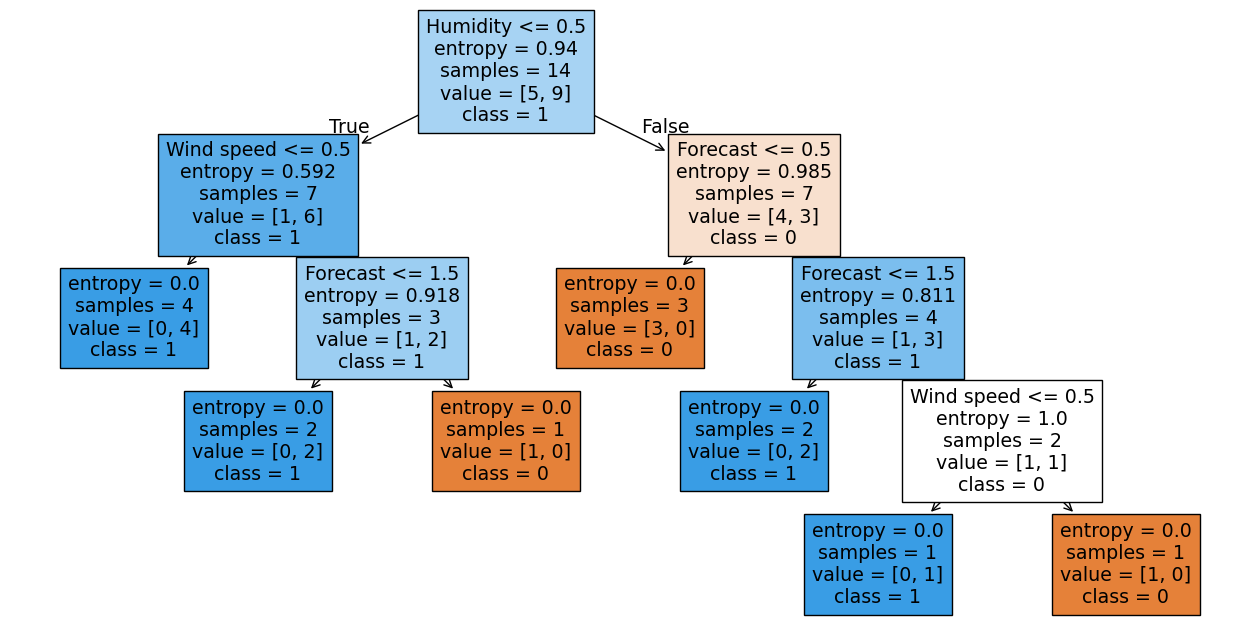

In [7]:
# scikit-learn의 DecisionTreeClassifier를 엔트로피 기준으로 학습
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X, y)

# Decision Tree for binary classifier
plt.figure(figsize=(16,8))
tree.plot_tree(clf, feature_names=['Forecast', 'Temperature', 'Humidity', 'Wind speed'], class_names=['0', '1'], filled=True)
plt.show()

scikit-learn에서는 습도가 1단계로 나누었고, 직접 계산결과와 상이하다.

# **과제 2 : drug200.data scikit-learn으로 처리**

<ipython-input-66-a98accbefebb>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M':1, 'F':2})
<ipython-input-66-a98accbefebb>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP'] = df['BP'].replace({'LOW':1, 'NORMAL':0, 'HIGH':2})
<ipython-input-66-a98accbefebb>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_op

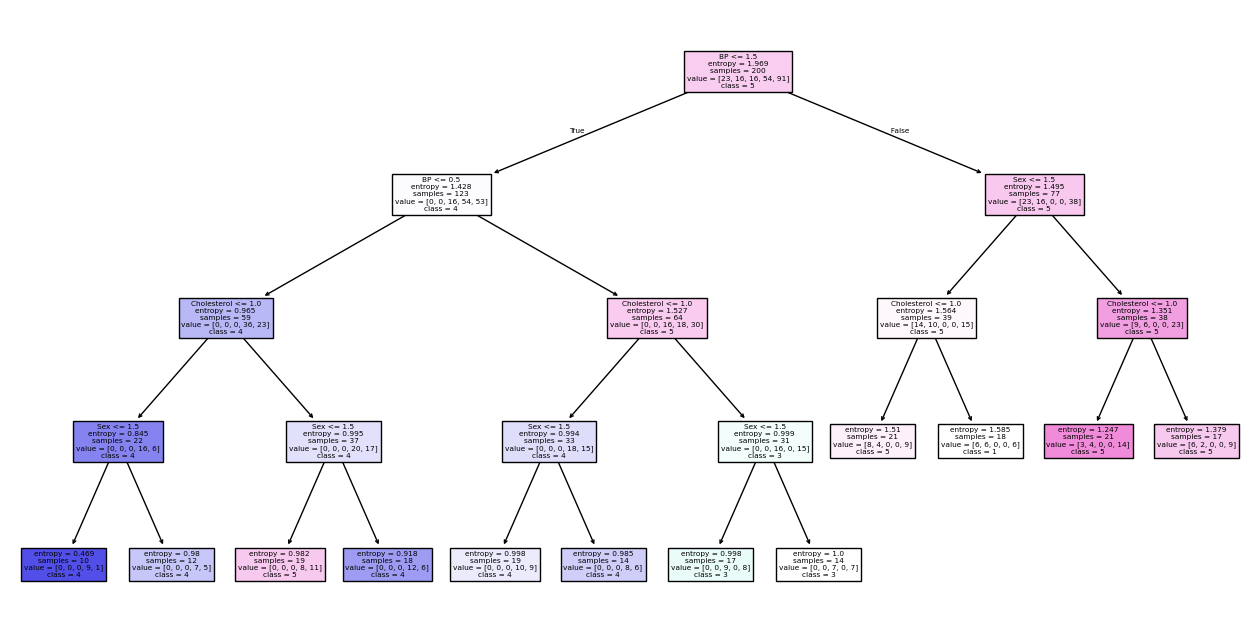

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/머신러닝/5.30/drug200.csv')
df['Sex'] = df['Sex'].replace({'M':1, 'F':2})
df['BP'] = df['BP'].replace({'LOW':1, 'NORMAL':0, 'HIGH':2})
df['Cholesterol'] = df['Cholesterol'].replace({'LOW' : 1, 'NORMAL':0, 'HIGH':2})
df['Drug'] = df['Drug'].replace({'drugA':1, 'drugB':2, 'drugC':3, 'drugX':4, 'drugY':5})
df.head()

X = df.iloc[:,1:4]
y = df.iloc[:,5]

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state=0)
clf.fit(X,y)

# Decision Tree for binary classifier
plt.figure(figsize=(16,8))
tree.plot_tree(clf, feature_names=['Sex', 'BP', 'Cholesterol'], class_names=[str(c) for c in clf.classes_], filled=True)
plt.show()